In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import log
import anndata as ad
import pandas as pd

In [4]:
input_file = "/Users/manuel/Desktop/dge_original/dge_orig.h5ad"
orig = sc.read(input_file)

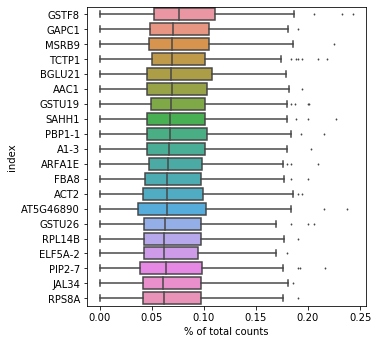

In [5]:
sc.pl.highest_expr_genes(orig, n_top=20, )

In [13]:
sc.pp.normalize_total(orig, target_sum=1e4)
sc.pp.log1p(orig)
sc.pp.highly_variable_genes(orig, min_mean=0.0125, max_mean=3, min_disp=0.5)
orig_hvg = orig[:, orig.var.highly_variable]

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


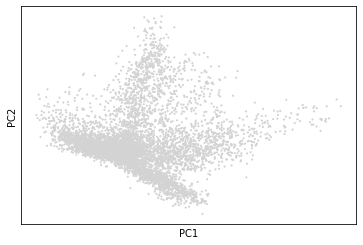

In [14]:
sc.pp.scale(orig_hvg, max_value=10)
sc.tl.pca(orig_hvg, svd_solver='arpack', n_comps=100)
sc.pl.pca(orig_hvg)

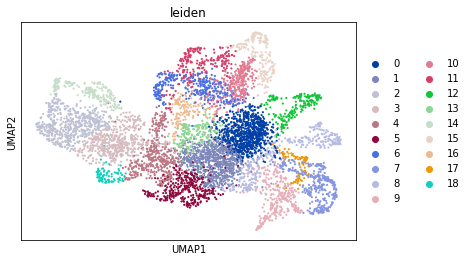

In [15]:
sc.pp.neighbors(orig_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(orig_hvg)
sc.tl.leiden(orig_hvg)
sc.pl.umap(orig_hvg, color='leiden')

In [16]:
sc.tl.rank_genes_groups(orig_hvg, 'leiden', method='t-test')
sc.pl.rank_genes_groups(orig_hvg, n_genes=25, sharey=False)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


In [32]:
pd.DataFrame(orig_hvg.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,AT5G46890,RPS16C,AT1G25275,ATTI4,RPL36A,HMGB6,GULLO5,AT1G10682,PER3,AT1G12080,CEP2-1,AT2G04170,EXT3,YCF1.2,JAL10,AT3G28550,GATA4,AT5G04080,RGF3
1,BGLU21,RPS23B,PER61,ML3,AT3G03920,UBC20,XTH18,PDF2.3,AGP7,AGP14,AT3G20370,BHLH66,PCAP1,RPS19-1,AT5G60530,AT3G54580,AT4G22230,AT3G59370,PIN4
2,PBP1-1,RPL27B,AT5G60530,MT2B,AT5G08180,ENODL15,AT4G15160,AGP14,AT1G62480,AGP21,ZW9,RRA3,AT2G45180,ATPE,AT2G43610,AT5G05500,AGP31,ACO2,ADF9
3,AT5G46900,RPL21A-1,CYP87A2,TRX5,HDT2,RPL36A,CYP81D11,GASA1,CCoAOMT1,AGP13,PDIL1-1,AT1G67330,ELP,RPL16-1,AT5G54370,AT1G23720,BIP,AT5G40980,YUC3
4,JAL34,RPL12A-1,DFC,AT5G62340,RPL12C,RPS27B,PAE11,DIR14,AGP26,AT2G13820,AT1G04040,XEG113,CHS,RPOA,AT1G78850,TIP1-1,FLA9,FLA8,AT1G78520
5,ANN1,RPL15B,JAL33,AT1G25275,RBG4,AT5G16250,RD21A,AGP12,GASA7,AGP12,TIP1-2,UXS4,AGP7,RRN26,KTI2,AT5G17820,AT5G44585,AGP14,AT5G09960
6,AT1G04040,RPS13B,AT5G35735,JAL33,NUCL1,RPL17A,PMEI11,CCoAOMT1,CAD4,COR47,PER16,PPC3,PIP1-1,RPL16,JAL9,TIP2-2,SKS6,PER30,AT1G72490
7,TIP1-2,RPL17A,AT1G78850,GSTU25,CBF5,RPL37C,AT4G20830,AT1G12080,ELP,AT1G62480,AT4G22214,AT5G40510,AT4G12520,ATMG00090,JAL8,PRP3,ARP1-1,AGP13,RGF2
8,AT5G26260,RBG7,GSTU25,AT5G60520,RPL9D,AT3G03920,PGIP1,FLA8,PER39,PATL1,AT5G26260,AT3G23175,AT5G40450,ACCD,CEP2-1,EXT2,GMD1,PDF2.3,MT2B
9,PIP2-7,RPS26C,JAL10,AT5G03210,RPL28C,AT4G12600,AT3G08030,TIP1-1,AGP12,DIR14,PER45,ACO2-1,PER45,RPS3,PER61,AGP3,AT1G54890,AT1G10682,AT1G18265


In [40]:
u1, u2 = get_umap_data(orig_hvg)
leiden = get_leiden_clustering_data(orig_hvg)

Text(0.5, 0, 'UMAP1')

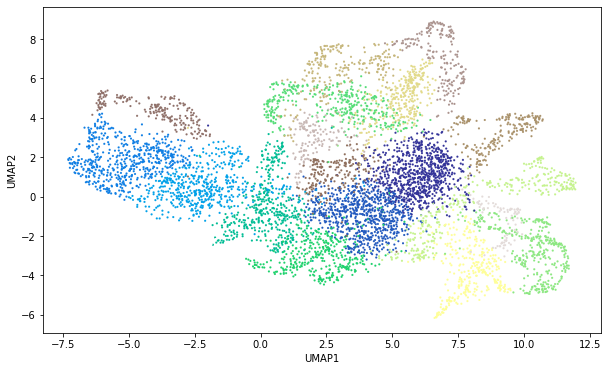

In [71]:
fig, axes = plt.subplots(1,1, figsize = (10,6))

axes.scatter(u1, u2, s=4, c=leiden, cmap='terrain', 
            edgecolor=None, linewidth=0.1, alpha=1)
axes.set_ylabel("UMAP2")
axes.set_xlabel("UMAP1")
# axes.set_title("UMAP", size='xx-large')

No handles with labels found to put in legend.


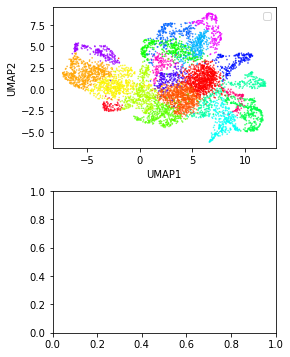

In [75]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[0].set_ylabel("UMAP2")
axes[0].set_xlabel("UMAP1")
axes[0].legend()

# axes[1].hist(orig.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
# axes[1].set_yscale('log')
# axes[1].set_xscale('log')
# axes[1].set_ylabel("frequency")
# axes[1].set_xlabel("total counts")
# plt.savefig('/Users/manuel/Desktop/orig.png', dpi=500, bbox_inches='tight')

# ----------------------------------

In [2]:
input_file = "/Users/manuel/Desktop/dge_10000.h5ad"
sp_dge = sc.read(input_file)

In [4]:
sc.pp.calculate_qc_metrics(sp_dge, inplace=True)

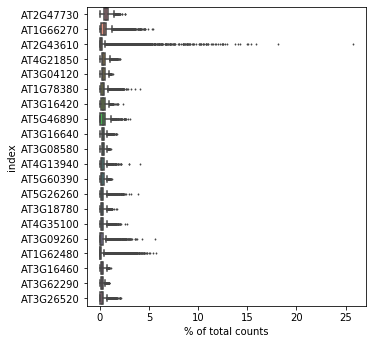

In [12]:
sc.pl.highest_expr_genes(sp_dge, n_top=20, )

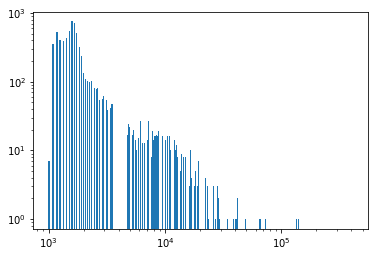

In [6]:
plt.hist(sp_dge.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

10000


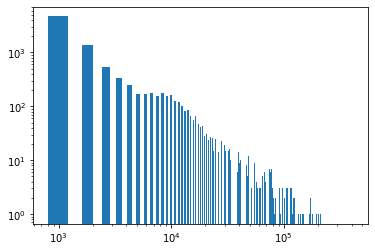

In [7]:
lower_lim = sp_dge.obs['total_counts'] > 1
upper_lim = sp_dge.obs['total_counts'] < 1000000
sp_dge.obs['keep'] = lower_lim & upper_lim
print(sum(sp_dge.obs["keep"]))

sub = sp_dge[sp_dge.obs['keep'] == True,]
plt.hist(sub.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

## PCA

In [26]:
sub = sp_dge
sc.pp.normalize_total(sub, target_sum=1e4)
sc.pp.log1p(sub)
sc.pp.highly_variable_genes(sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
sub_hvg = sub[:, sub.var.highly_variable]

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


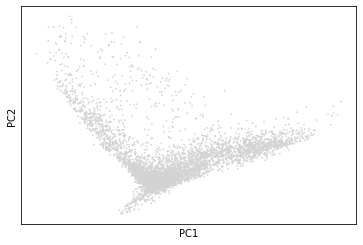

In [27]:
sc.pp.scale(sub_hvg, max_value=10)
sc.tl.pca(sub_hvg, svd_solver='arpack', n_comps=100)
sc.pl.pca(sub_hvg)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../ana

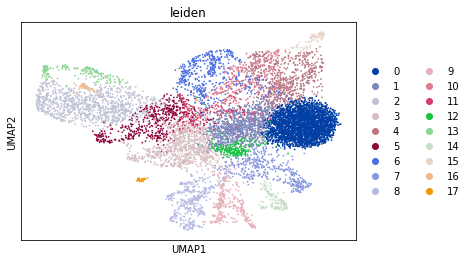

In [28]:
sc.pp.neighbors(sub_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(sub_hvg)
sc.tl.leiden(sub_hvg)
sc.pl.umap(sub_hvg, color='leiden')

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


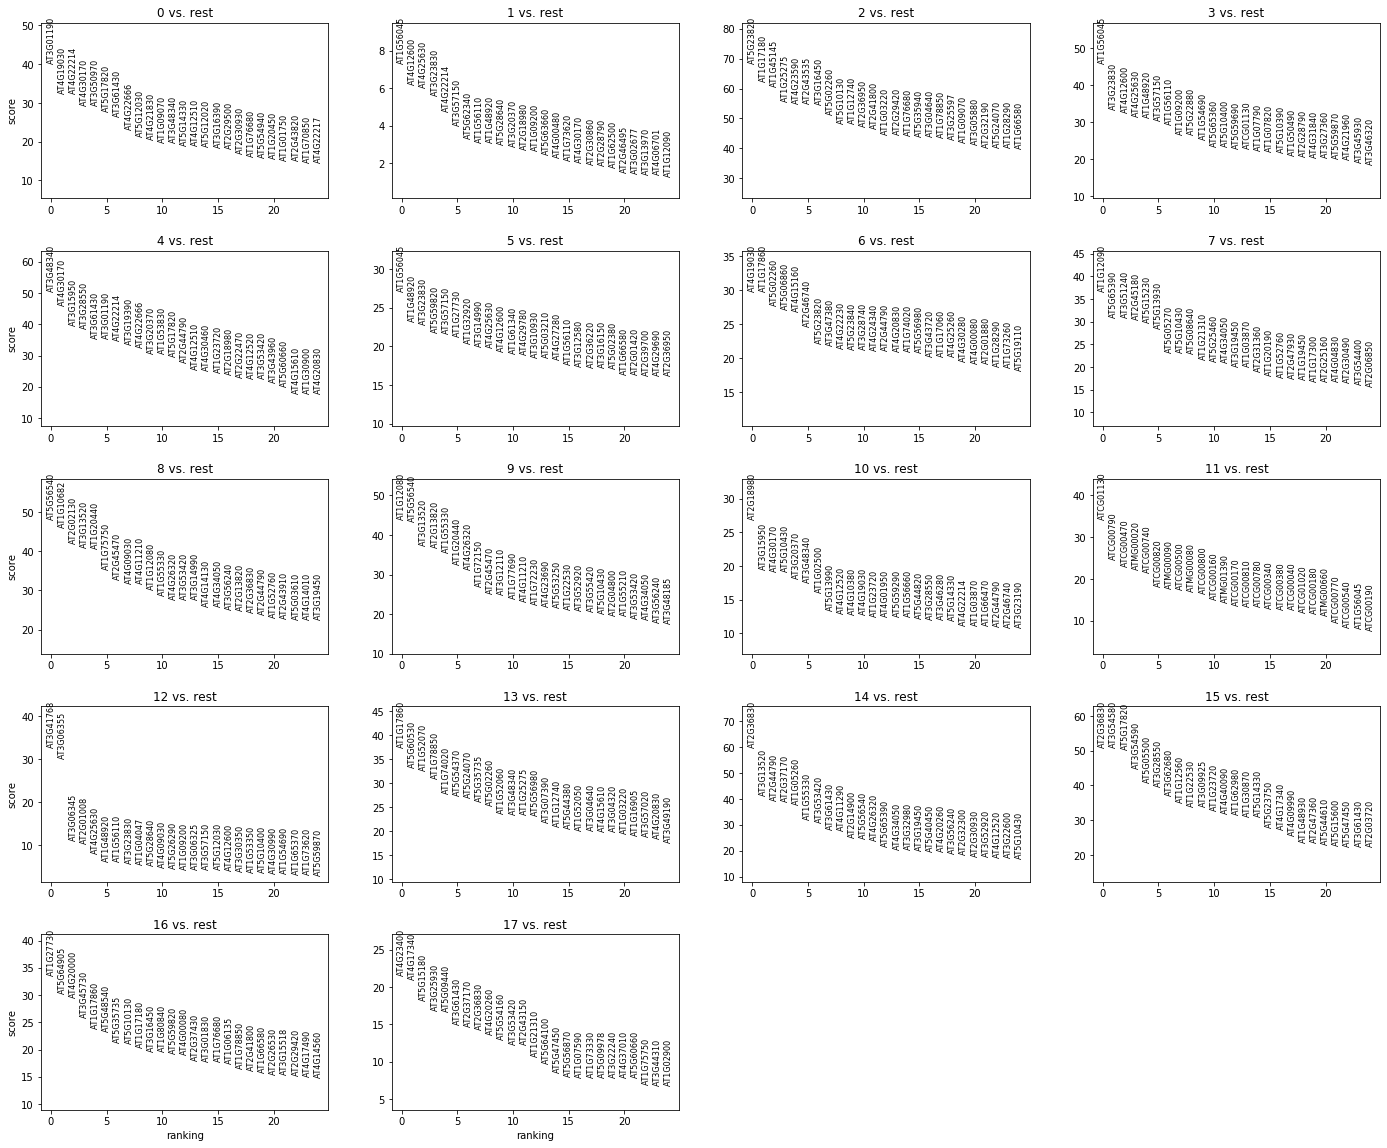

In [30]:
sc.tl.rank_genes_groups(sub_hvg, 'leiden', method='t-test')
sc.pl.rank_genes_groups(sub_hvg, n_genes=25, sharey=False)

In [31]:
pd.DataFrame(sub_hvg.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,AT3G01190,AT1G56045,AT5G23820,AT1G56045,AT3G48340,AT1G56045,AT4G19030,AT1G12090,AT5G56540,AT1G12080,AT2G18980,ATCG01130,AT3G41768,AT1G17860,AT2G36830,AT2G36830,AT1G27730,AT4G23400
1,AT4G19030,AT4G12600,AT1G17180,AT3G23830,AT4G30170,AT1G48920,AT1G17860,AT5G65390,AT1G10682,AT5G56540,AT3G15950,ATCG00790,AT3G06355,AT5G60530,AT3G13520,AT3G54580,AT5G64905,AT4G17340
2,AT4G22214,AT4G25630,AT1G45145,AT4G12600,AT3G15950,AT3G23830,AT5G02260,AT3G51240,AT2G02130,AT3G13520,AT4G30170,ATCG00470,AT3G06345,AT1G52070,AT2G44790,AT5G17820,AT4G20000,AT5G15180
3,AT4G30170,AT3G23830,AT1G25275,AT4G25630,AT3G28550,AT5G59820,AT5G06860,AT2G45180,AT3G13520,AT2G13820,AT5G10430,ATMG00020,AT2G01008,AT1G78850,AT2G37170,AT3G54590,AT3G45730,AT3G25930
4,AT3G50970,AT4G22214,AT4G23590,AT1G48920,AT3G61430,AT3G57150,AT4G15160,AT5G15230,AT1G20440,AT1G55330,AT3G20370,ATCG00740,AT4G25630,AT1G74020,AT1G05260,AT5G05500,AT1G17860,AT5G09440


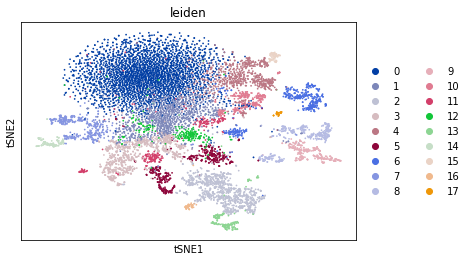

In [18]:
sc.tl.tsne(sub_hvg)
sc.pl.tsne(sub_hvg, color='leiden')

In [39]:
def get_umap_data(anndata_object):
    length = len(anndata_object.obsm["X_umap"])
    u1_my = [0]*length
    u2_my = [0]*length

    for i in range(length):
        u1_my[i] = anndata_object.obsm["X_umap"][i][0]
        u2_my[i] = anndata_object.obsm["X_umap"][i][1]
        
    return u1_my, u2_my


def get_leiden_clustering_data(anndata_object):
    length = len(anndata_object.obs)
    cluster_no_my = [0]*length

    for i in range(length):
        cluster_no_my[i] = int(anndata_object.obs['leiden'][i])
    
    return cluster_no_my